# <u>Experiment - 07 (B)</u>

## To implement fuzzy control system. 

### <u>Design an automobile or washingmachine controller.<u/>

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Define the input and output variables
dirtness_level = ctrl.Antecedent(np.arange(0,11,1), 'Dirtness_Level')
load_size = ctrl.Antecedent(np.arange(0,11,1), 'Load_Size')
wash_time = ctrl.Consequent(np.arange(0,101,1), 'Wash_Time')

In [3]:
load_size['Small'] = fuzz.trimf(load_size.universe, [0,0,5])
load_size['Medium'] = fuzz.trimf(load_size.universe, [0,5,10])
load_size['Large'] = fuzz.trimf(load_size.universe, [5,10,10])

In [4]:
wash_time['Short'] = fuzz.trimf(wash_time.universe, [0,0,50])
wash_time['Medium'] = fuzz.trimf(wash_time.universe, [0,50,100])
wash_time['Long'] = fuzz.trimf(wash_time.universe, [50,100,100])

In [5]:
dirtness_level['Low'] = fuzz.trimf(dirtness_level.universe, [0,0,5])
dirtness_level['Medium'] = fuzz.trimf(dirtness_level.universe, [0,5,10])
dirtness_level['High'] = fuzz.trimf(dirtness_level.universe, [5,10,10])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

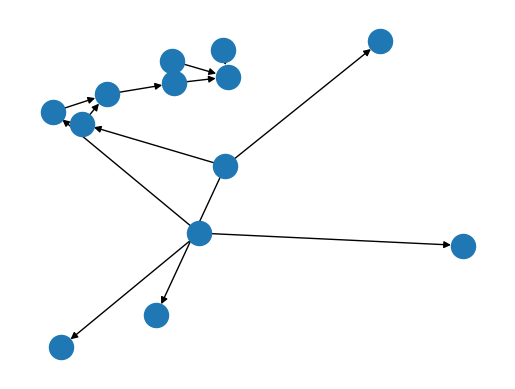

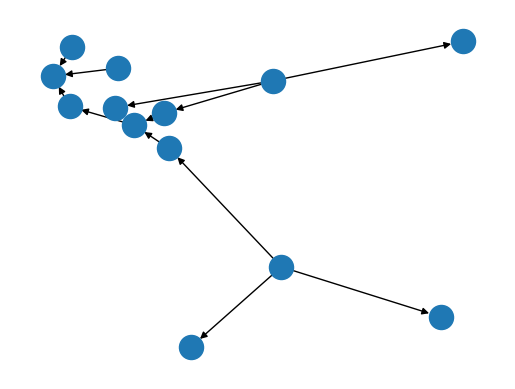

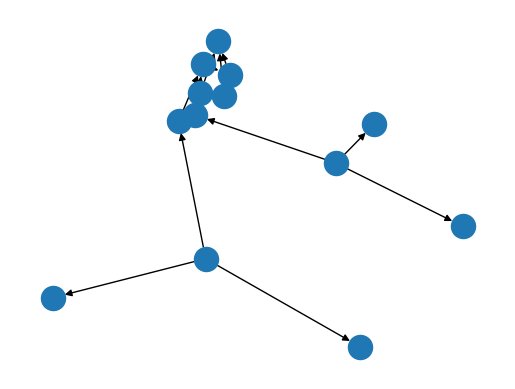

In [6]:
# Create fuzzy rules
rule1 = ctrl.Rule(dirtness_level['Low'] & load_size['Small'], wash_time['Short'])
rule2 = ctrl.Rule(dirtness_level['Medium'] & load_size['Medium'], wash_time['Medium'])
rule3 = ctrl.Rule(dirtness_level['High'] & load_size['Large'], wash_time['Long'])
rule1.view()
rule2.view()
rule3.view()

In [7]:
# Implement fuzzy inference system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
washing = ctrl.ControlSystemSimulation(washing_ctrl)

In [8]:
washing.input['Dirtness_Level'] = 6
washing.input['Load_Size'] = 5

In [9]:
# Perform fuzzy interference
washing.compute()

In [11]:
wash_time_output = washing.output['Wash_Time']

In [13]:
print(f"Recommended Wash Time:{wash_time_output:.2f} Minutes")

Recommended Wash Time:50.00 Minutes


### Example-2: Suppose we have Dirtness Level and Load Size as 2.

In [15]:
washing.input['Dirtness_Level'] = 2
washing.input['Load_Size'] = 2

washing.compute()

wash_time_output = washing.output['Wash_Time']
print(f"Recommended Wash Time:{wash_time_output:.2f} Minutes")

Recommended Wash Time:41.22 Minutes
